## Classification on the Covertype Dataset

You can load the Covertype from https://www.kaggle.com/uciml/forest-cover-type-dataset

The samples in this dataset correspond to 30×30m patches of forest in the US, collected for the task of predicting each patch’s cover type, i.e. the dominant species of tree. There are seven covertypes, making this a multiclass classification problem. Each sample has 54 features, described on the dataset’s homepage. Some of the features are boolean indicators, while others are discrete or continuous measurements.

sklearn.datasets.fetch_covtype will load the covertype dataset; it returns a dictionary-like object with the feature matrix in the data member and the target values in target. The dataset will be downloaded from the web if necessary.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

The dataset is a bigger than the ones we have dealtso far, so you may choose to take a small part of data first to work on it. For that purpose, you may use `train_test_split` to partition the data and choose a small sample from that. You can use 

`X_data,X_drop,y_data,y_drop=train_test_split(X,y,
                                             random_state=0,train_size=0.01)`

In [2]:
data = pd.read_csv("covtype.csv")
X = data.drop("Cover_Type", axis=1)
y = data.Cover_Type

X_data,X_drop,y_data,y_drop=train_test_split(X, y, random_state=1, train_size=0.01)


1. Visualize the univariate distribution of each feature, and the distribution of the target.

Distribution of Each Feature


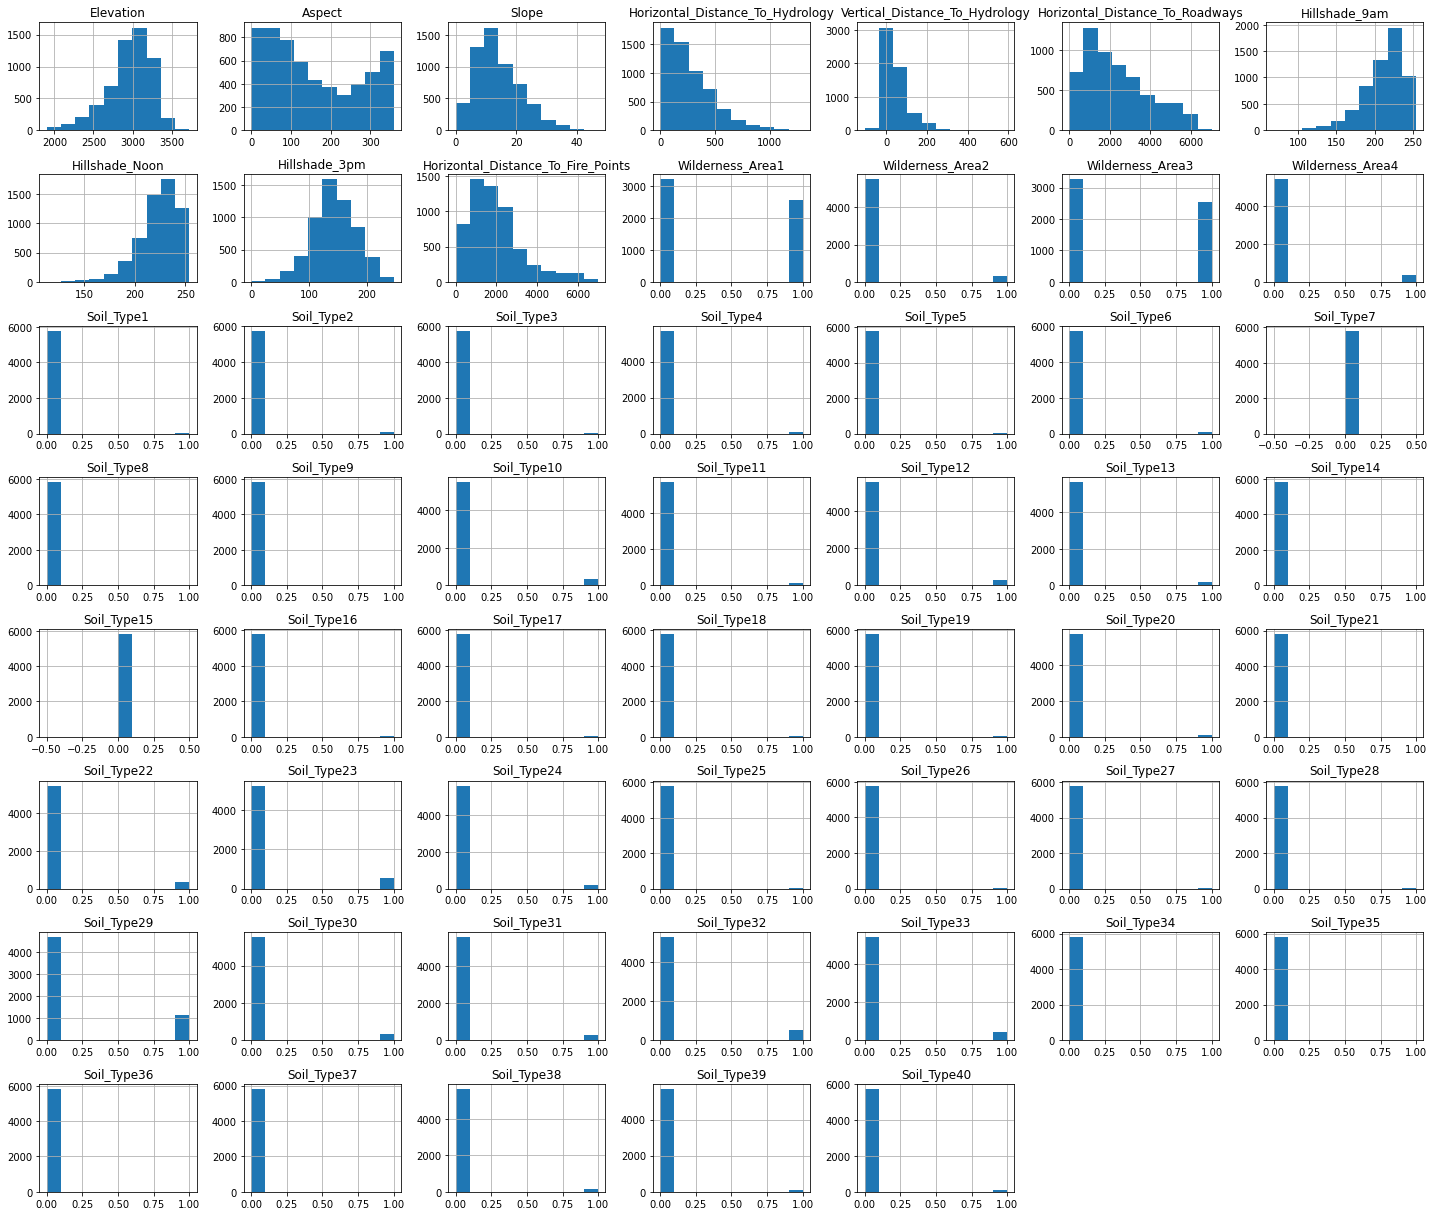

Distribution of Target


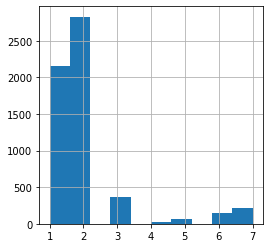

In [3]:
print ("Distribution of Each Feature")
X_data.hist(figsize=(20,17))  
plt.tight_layout()
plt.show() 

print ("Distribution of Target")
y_data.hist(figsize=(4,4))  
plt.show() 

2. Split data into training and test set. Evaluate linear support vector machines (`LinearSVC`) using cross-validation. Use StratifiedKFold. How different are the results? Are there any missing values? How does scaling the data with StandardScaler influence the results?

#### The results from evaulating LinearSVC using cross-validation is slightly better(0.407) than the results of using StratifiedKFold(0.375). There are no missing values. Scaling the data with Standard Scaler increased both results, with and without StratifiedKFold, to a very similar score at 0.7124 and 0.7126 respectively. 

In [4]:
# Splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, random_state=1)

In [5]:
# Evaulate LinearSVC using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=1)
scores = cross_val_score(svc, X_train, y_train, cv=10)

print ("Cross Validation Max score: ", max(scores))
print ("Cross Validation Mean score: ", np.mean(scores))
print ("Cross Validation Std score: ", np.std(scores))

Cross Validation Max score:  0.5504587155963303
Cross Validation Mean score:  0.4078129283981863
Cross Validation Std score:  0.17279937252195818


In [6]:
# Evaulate LinearSVC using StratifiedKFold
from sklearn.model_selection import StratifiedKFold

svc = LinearSVC(random_state=1)

skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svc,X_train,y_train,cv=skf)

print ("Max StratifiedKFold Validation Score: ", max(scores))
print ("Mean StratifiedKFold Validation Score: ", np.mean(scores))
print ("Std StratifiedKFold Validation Score: ", np.std(scores))

Max StratifiedKFold Validation Score:  0.6123853211009175
Mean StratifiedKFold Validation Score:  0.37527997469155333
Std StratifiedKFold Validation Score:  0.13310092988728364


In [7]:
# No missing values
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
# Results after Standard Scaling
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Cross Validation scores
svc = LinearSVC(random_state=1)
scores = cross_val_score(svc, X_scaled, y_train, cv=10)

print ("Scaled Max Cross Validation score: ", max(scores))
print ("Scaled Mean Cross Validation score: ", np.mean(scores))
print ("Scaled Std Cross Validation score: ", np.std(scores))

# Evaulate LinearSVC using StratifiedKFold scores
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svc,X_scaled,y_train,cv=skf)

print ("Max StratifiedKFold Validation Score: ", max(scores))
print ("Mean StratifiedKFold Validation Score: ", np.mean(scores))
print ("Std StratifiedKFold Validation Score: ", np.std(scores))

# Results brought the cross validation scores closer to the StratifiedKFold scores by slightly 
# increasing cross validation scores while slight lowering StratifiedKFold scores

Scaled Max Cross Validation score:  0.7195402298850575
Scaled Mean Cross Validation score:  0.7124190656965095
Scaled Std Cross Validation score:  0.00723697047353073
Max StratifiedKFold Validation Score:  0.7408256880733946
Mean StratifiedKFold Validation Score:  0.712637351049246
Std StratifiedKFold Validation Score:  0.019309009501255015


3. Tune the parameter `C` using GridSearchCV. Do the results improve? Visualize the performance as function of the parameter for the model. For visualization, you can plot the model performance versus different `C` values.

#### The results improved when tuning the parameter C using GridSearchCV.

In [9]:
# using GridSearchCV to tune parameter "C"
from sklearn.model_selection import GridSearchCV

svc = LinearSVC(random_state=1)
param_grid = {'C': [0.01,0.1,1,10]}

grid_svc = GridSearchCV(svc,param_grid=param_grid,cv=skf,return_train_score=True)
grid_svc.fit(X_train, y_train)

print(grid_svc.best_score_, grid_svc.best_params_, grid_svc.score(X_test,y_test))

0.46409522303068645 {'C': 0.01} 0.5478320715760495


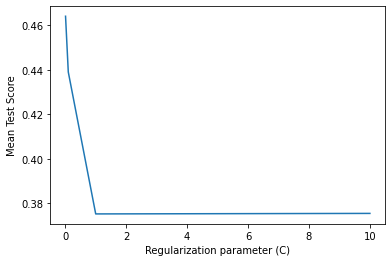

In [10]:
#Visualized performance of parameter for the model
import matplotlib.pyplot as plt

plt.plot([0.01,0.1,1,10], grid_svc.cv_results_['mean_test_score'])
plt.xlabel("Regularization parameter (C)")
plt.ylabel("Mean Test Score")
plt.show()

4. Change the cross-validation strategy from `StratifiedKFold` to `Kfold` with shuffling. Do the parameters that are found change? You can also try (Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?)

#### The validation scores with KFold increased the results of LinearSVC without Standard Scaling. Changing the random state of the split into training and testing data does change the results.

In [11]:
# Kfold Validation with shuffling 
from sklearn.model_selection import KFold

svc = LinearSVC(random_state=1)

kf = KFold(n_splits=10, random_state=1, shuffle=True)    

scores = cross_val_score(svc,X_train,y_train,cv=kf)

print ("KFold Validation Score: ", max(scores))
print ("KFold Validation Score: ", np.mean(scores))
print ("KFold Validation Score: ", np.std(scores))

KFold Validation Score:  0.6261467889908257
KFold Validation Score:  0.5278587999578193
KFold Validation Score:  0.06755226040339027


In [12]:
# Kfold Validation with shuffling, different random_state
from sklearn.model_selection import KFold

X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, random_state=42)

svc = LinearSVC(random_state=1)

kf = KFold(n_splits=10, random_state=1, shuffle=True)    

scores = cross_val_score(svc,X_train,y_train,cv=kf)

print ("KFold Validation Score: ", max(scores))
print ("KFold Validation Score: ", np.mean(scores))
print ("KFold Validation Score: ", np.std(scores))

KFold Validation Score:  0.5871559633027523
KFold Validation Score:  0.46654539702625747
KFold Validation Score:  0.0878353964336975
